# Facial Recognition

In [276]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.src.utils.data_utils import get_file
import keras_vggface
from keras_vggface.vggface import VGGFace
import mtcnn
import keras_vggface.utils
import PIL
import os
import os.path
from sklearn.utils.class_weight import compute_class_weight

In [20]:
vggface = VGGFace(model='vgg16')



580070376/580070376 [==============================] - 168s 0us/step


In [21]:
print(vggface.summary())
print(f"Inputs: {vggface.inputs}")
print(f"Outputs: {vggface.outputs}")

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [22]:
!mkdir public_images
!wget -O puiblic_images/scalia.jpg 'https://commons.wikimedia.org/wiki/File:Antonin_Scalia_Official_SCOTUS_Portrait.jpg'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [71]:
scalia_photo = plt.imread('public_images/sorvino.jpg')
scalia_photo.shape

(1365, 2048, 3)

In [72]:
face_detector = mtcnn.MTCNN()
face_roi = face_detector.detect_faces(scalia_photo)

1/1 [==============================] - 1s 605ms/step


In [73]:
face_roi

[{'box': [999, 157, 377, 496],
  'confidence': 0.999916672706604,
  'keypoints': {'left_eye': (1087, 349),
   'right_eye': (1259, 370),
   'nose': (1149, 456),
   'mouth_left': (1077, 515),
   'mouth_right': (1236, 540)}}]

In [74]:
x1, y1, width, height = face_roi[0]['box']
x2, y2 = x1 + width, y1 + height
face = scalia_photo[y1:y2, x1:x2]
print(face.shape)

(496, 377, 3)


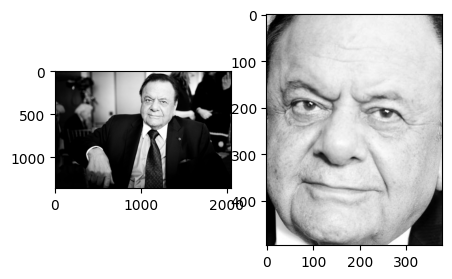

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,3))
axes[0].imshow(scalia_photo)
axes[1].imshow(face)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(496, 377, 3)
1/1 [==============================] - 0s 280ms/step


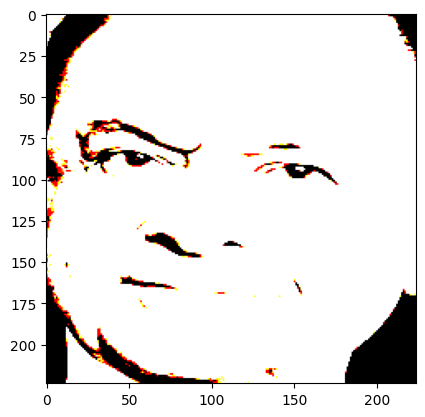

In [76]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from PIL import Image
import numpy as np

def resize_image(image_array, target_size):
    image = Image.fromarray(image_array)
    resized_image = image.resize(target_size)
    return np.array(resized_image)


print(face.shape)
# Assuming face_array is your input image data
face_array_resized = resize_image(face, target_size=(224, 224))

# Expand dimensions to create a batch of size 1
face_array_expanded = np.expand_dims(face_array_resized, axis=0)
plt.imshow(face_array_expanded[0])

# Preprocess the input data for VGG16
face_array_preprocessed = preprocess_input(face_array_expanded)
plt.imshow(face_array_preprocessed[0])

predictions = vggface.predict(face_array_expanded)

In [78]:
from keras_vggface.utils import decode_predictions
names = decode_predictions(predictions, top = 2622)
(names[0][0])

In [ ]:
https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset/
https://www.kaggle.com/datasets/rishabkoul1/vechicle-dataset

# Fine Tuning

In [70]:
import facial_recognition
import importlib
importlib.reload(facial_recognition)


<module 'facial_recognition' from 'c:\\Users\\ravin\\Documents\\Machine Learning\\Facial-Recognition\\Facial-Recognition\\facial_recognition.py'>

In [43]:
dataset, label_to_index = facial_recognition.custom_image_dataset() #~16 minutes to create dataset

No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detected, moving on.
No face detect

In [48]:
label_to_index

{'madonna': 0, 'ravi': 1, 'unknown': 2, 'rdj': 3}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


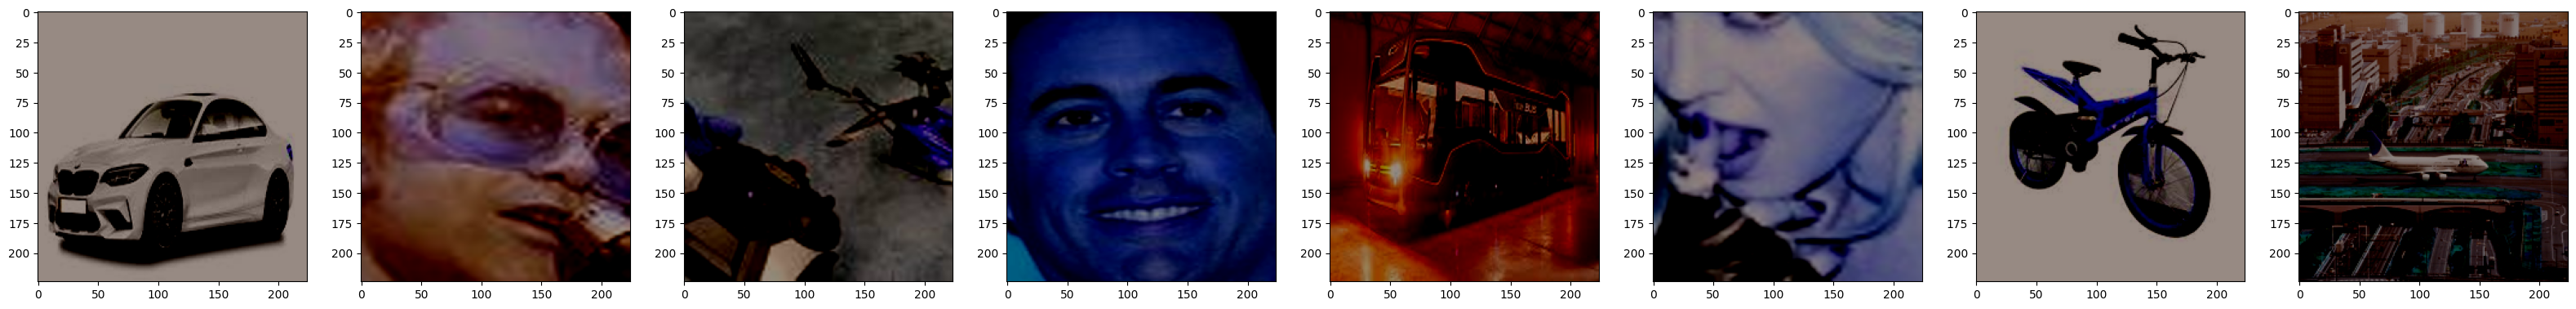

In [44]:
# Iterate over the dataset
for batch in dataset:
    images, labels = batch
    break

fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(10*4,6))
for i in range(8):
    axes[i].imshow(np.array(images[i],np.int32))

plt.show()

In [45]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, Flatten, Add, Dense, Activation, BatchNormalization, Lambda, ReLU, PReLU, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.legacy import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler

vggface_foundation = VGGFace(model='vgg16', include_top=False, input_shape = (224, 224, 3))

data_augmentation = keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)                                                                                                                                                                         
])

# Number of new classes + 1 for the unknown class
number_classes = 4
                                                        
# Freeze Base model to only train fine tuning layers
vggface_foundation.trainable = False
last_layer = vggface_foundation.get_layer('pool5').output

# Building fine tuning model
inputs = tf.keras.Input(shape=(224,224,3))

x = data_augmentation(inputs)
x = vggface_foundation(x)
x = Flatten(name = 'flatten')(x)
out = Dense(number_classes, name = 'personalized_classifier')(x)
custom_vgg_model = Model(inputs, out)

custom_vgg_model.summary()

Model: "model_1815"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1823 (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 vggface_vgg16 (Functional)  (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 personalized_classifier (D  (None, 4)                 100356    
 ense)                                                           
                                                                 
Total params: 14815044 (56.51 MB)
Trainable params: 100356 (392.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________

In [46]:
learning_rate = 0.0001
custom_vgg_model.compile(optimizer=Adam(learning_rate = learning_rate),
                        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                        metrics = ['accuracy'])

In [47]:
from sklearn.utils.class_weight import compute_class_weight

# Extract labels from the dataset
train_labels = np.concatenate([label_tensor.numpy() for _, label_tensor in dataset])

# Get unique class labels
class_labels = np.unique(train_labels)

# Compute class weights
class_weights = compute_class_weight('balanced', classes = class_labels, y = train_labels)
class_weight_dict = dict(zip(class_labels, class_weights))

print("Class Labels:", class_labels)
print("Class Weights:", class_weight_dict)

Class Labels: [0 1 2 3]
Class Weights: {0: 2.75, 1: 2.64, 2: 0.336734693877551, 3: 3.473684210526316}


In [50]:
history = custom_vgg_model.fit(dataset, epochs = 20, class_weight=class_weight_dict) 

Epoch 1/20


33/33 [==============================] - 84s 2s/step - loss: 10.3845 - accuracy: 0.3977
Epoch 2/20
33/33 [==============================] - 74s 2s/step - loss: 3.7031 - accuracy: 0.7008
Epoch 3/20
33/33 [==============================] - 71s 2s/step - loss: 2.4553 - accuracy: 0.7462
Epoch 4/20
33/33 [==============================] - 72s 2s/step - loss: 2.0180 - accuracy: 0.7917
Epoch 5/20
33/33 [==============================] - 71s 2s/step - loss: 0.7043 - accuracy: 0.8636
Epoch 6/20
33/33 [==============================] - 71s 2s/step - loss: 1.7617 - accuracy: 0.8295
Epoch 7/20
33/33 [==============================] - 71s 2s/step - loss: 0.5594 - accuracy: 0.8902
Epoch 8/20
33/33 [==============================] - 71s 2s/step - loss: 1.4075 - accuracy: 0.9053
Epoch 9/20
33/33 [==============================] - 71s 2s/step - loss: 1.0713 - accuracy: 0.8712
Epoch 10/20
33/33 [==============================] - 73s 2s/step - loss: 0.7262 - accuracy: 0.8977
Epoch 11/20
33/3

In [51]:
prob_model = Sequential([
    custom_vgg_model,
    tf.keras.layers.Softmax()
])

(800, 800, 3)
(206, 153, 3)


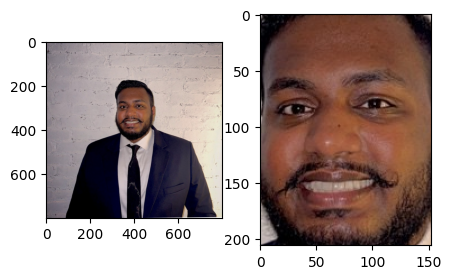

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


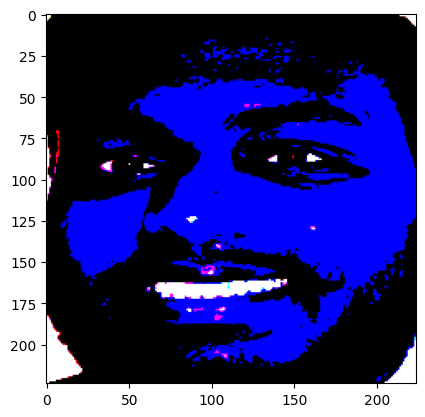

In [76]:
ravi_sample = preprocess_photo_1()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'madonna': 0, 'ravi': 1, 'unknown': 2, 'rdj': 3}
(224, 224, 3)
1/1 [==============================] - 0s 430ms/step
[[1.0000000e+00 2.5977529e-31 3.2844000e-27 5.9038032e-30]]


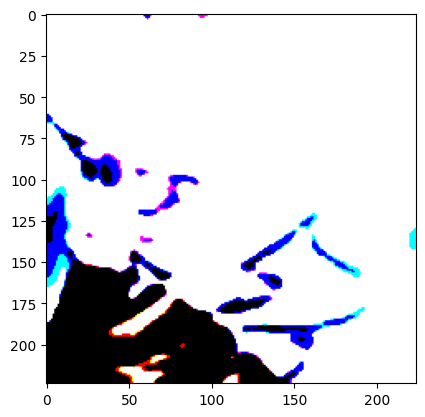

In [61]:
print(label_to_index)
j = 5
img = np.expand_dims(images[j], axis=0)  # new shape: (1, 720, 1280, 3)

print(images[j].shape)
plt.imshow(images[j])
predictions = prob_model.predict(img)
print(predictions)


In [77]:
predictions = prob_model.predict(ravi_sample)
print(predictions)


1/1 [==============================] - 0s 268ms/step
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.1620794e-34]]
